In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/scott/Desktop/Demo/Credit Card Customer Data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


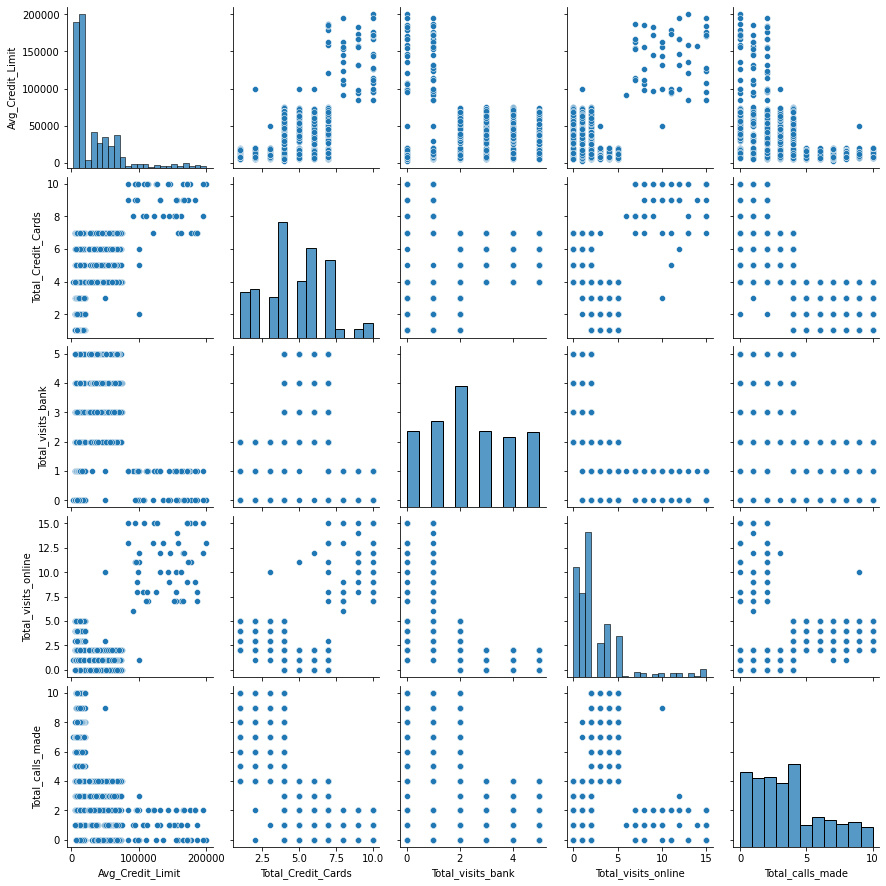

In [4]:
data = df.drop(['Sl_No','Customer Key'],axis=1).copy()
sns.pairplot(data)

In [6]:
X = df.iloc[:,2:].values
from sklearn.preprocessing import MinMaxScaler #Importing MinMaxScaler
scaler= MinMaxScaler() #Initialising the instance of the scaler
scaled_features = scaler.fit_transform(X) #Storing the scaled version of features in scaled_features

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters = n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print("for ", n_clusters," the avg score is ", silhouette_avg)

for  2  the avg score is  0.44339221155989544
for  3  the avg score is  0.5254186541442241
for  4  the avg score is  0.40129024510902517
for  5  the avg score is  0.32841808387794713


In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
data['Segment'] = y_kmeans

In [16]:
features = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

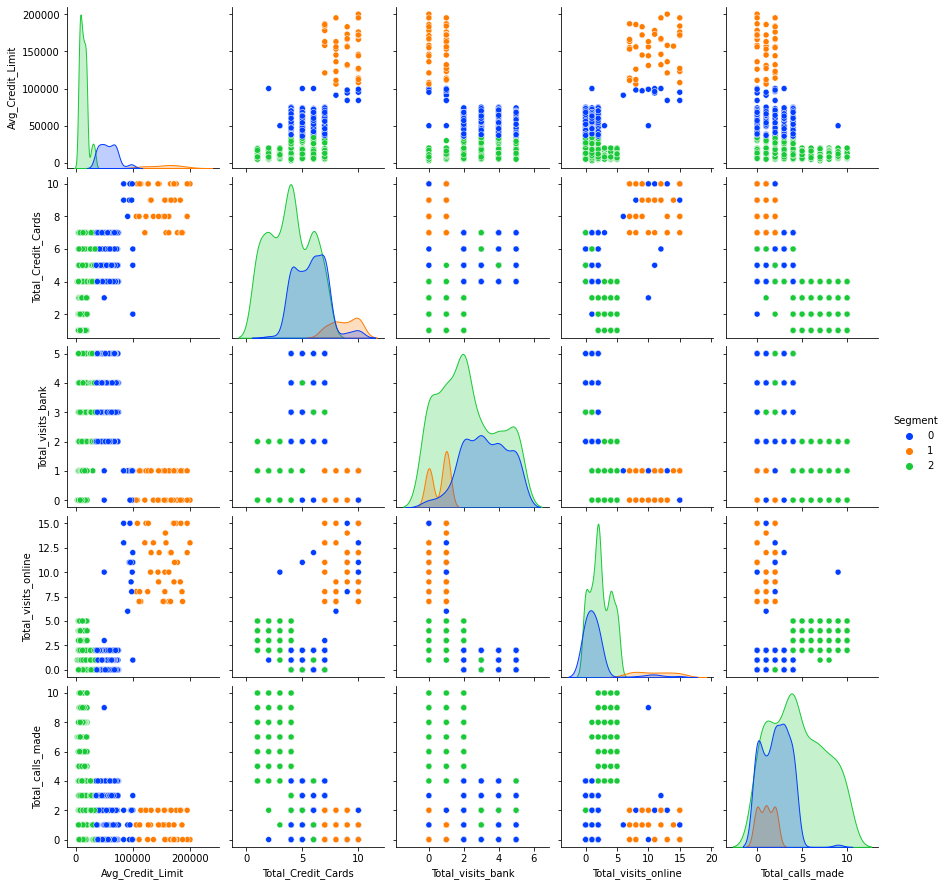

In [19]:
sns.pairplot(data, hue="Segment",palette='bright')

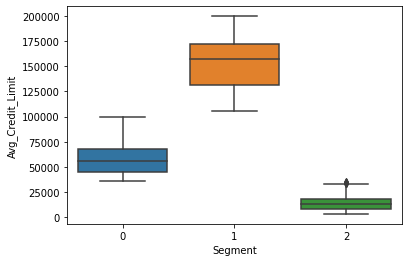

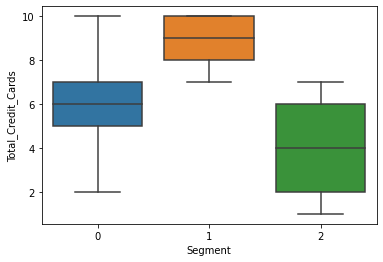

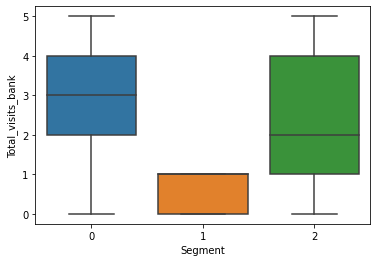

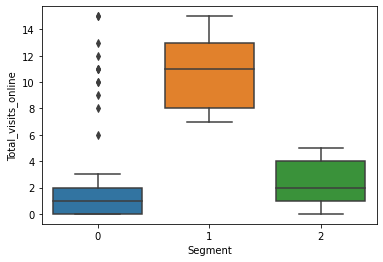

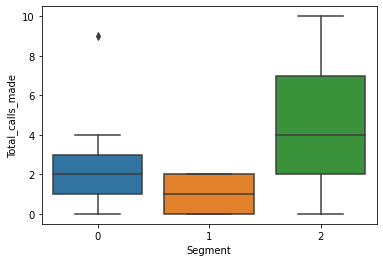

In [20]:
for feature in features:  #Loop to plot boxplot of each cluster
    sns.boxplot(x='Segment',y=feature,data=data)
    plt.show()